In [1]:
#importing all the packages necessary
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import networkx as nx
import itertools
import matplotlib.colors as colors
import matplotlib.cm as cmx
epsilon = 1e-10 #this is the default value im assigning all variables so that we dont get a division error if the value = 0
#matplotlib parameters
plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams.update({'font.size': 14})

In [2]:
import csv
import itertools

# Open the CSV file
with open('spawn non territorials only copy.csv', 'r', encoding='utf-8') as file:
    reader = csv.reader(file)
    header = next(reader)  # Read the header
    # Initializing variables
    edited_column_loop = [] #This will store the behavior values
    column_index = None 
    tank_ids = [] #This will store the tank ids

    # Check if 'Behavior' and 'Tank_ID' are in the header
    if "Behavior" in header and "TankID" in header:
        behavior_index = header.index("Behavior")
        tank_id_index = header.index("TankID")
        #print(f"Column 'Behavior' found at index {behavior_index}")
        #print(f"Column 'TankID' found at index {tank_id_index}")

        # Process each row
        for row in reader:
            if behavior_index < len(row) and tank_id_index < len(row):
                behavior_value = row[behavior_index]
                #print(behavior_value)
                edited_behavior_value = behavior_value.replace(' ', '_')
                #print(edited_behavior_value)
                edited_column_loop.append(edited_behavior_value)
                tank_ids.append(row[tank_id_index])
# Display unique edited behaviors and tank IDs
#print("Unique edited behaviors:", set(edited_column_loop))
#print("Unique Tank IDs:", set(tank_ids))

# Generate behavior combinations and their permutations
varIndv = {var: 0 for var in edited_column_loop}
#print(varIndv)
permutations = list(itertools.permutations(varIndv, 2))
permutations = ['|'.join(perm) for perm in permutations]
#print(permutations)

# Define self permutations and extend permutations list
self_perm = ['pot_entry|pot_entry','quiver_at_female|quiver_at_female',
             'lead_swim|lead_swim', 'pot_exit|pot_exit', 'chase_female|chase_female', 
             'dig|dig','flee_from_female|flee_from_female', 'attack_female|attack_female']
permutations.extend(self_perm)
#print(permutations)

In [3]:
# Initialize thee behavior combinations dictionary
BehvCombined = {perm: 0 for perm in permutations if '|' in perm}

In [4]:
# Increment behavior pair value in dictionary, keeps track of behavior combination frequency 
def increment_pair_value(dictionary, pairset):
    if pairset in dictionary:
        dictionary[pairset] = dictionary.get(pairset) + 1

In [5]:
#Increment individual behavior value in dictionary, keeps track of behavior frequency 
def increment_variable(dictionary, var):
    if var in dictionary:
        dictionary[var] = dictionary.get(var) + 1

In [6]:
# Initializing an empty list to store pairs of behaviors

behavior_pair_names_for_total = []

# Looping over the indices of 'edited_column_loop' list

for i in range(len(edited_column_loop)-1):
    
    # Retrieve the current behavior and the next behavior from the list
    
    behavior1 = edited_column_loop[i]
    behavior2 = edited_column_loop[i + 1]
    
    # Increment a variable (varIndv) based on the current behavior
    
    increment_variable(varIndv,behavior1 )
    
 # Check if the tank IDs of the current and next behaviors are the same

    if tank_ids[i] == tank_ids[i + 1]:
        
         # Concatenate the current and next behaviors with a '|' separator to create a pair
            
        behavior_pair = behavior1 + '|' + behavior2
        
       # Append the behavior pair to the list
    
        behavior_pair_names_for_total.append(behavior_pair)
        
         # Increment the count of this behavior pair in 'BehvCombined'
            
        increment_pair_value(BehvCombined , behavior_pair)

    else:
        
         # If the tank IDs are different, prints message indicating the samee
            
        print("different tank IDs", tank_ids[i],"and", tank_ids[i+1], behavior1, behavior2)
else:
    
    # Increment an individual variable based on the last behavior in the list
    
     increment_variable(varIndv,behavior2)

            

different tank IDs S1_NT and S3_NT pot_exit pot_entry
different tank IDs S3_NT and S5_NT chase_female flee_from_female
different tank IDs S5_NT and S8_NT dig pot_entry


In [7]:
import math
   
"""
    Calculates the probabilities of different behavior pairs occuring based on individual and combined data.

    This function takes two dictionaries: dictindv containing individual data and dictcombo containing combined data.
    It calculates relative values by dividing each combined value by its corresponding individual value.
    The resulting relative values are stored in a new dictionary, rel_values, where keys are combinations from dictcombo
    and values are the calculated relative values rounded to four decimal places.
    
    Parameters:
        dictindv (dict): Dictionary containing individual data.
        dictcombo (dict): Dictionary containing combined data.
        
    Returns:
        rel_values: A dictionary containing relative values, with combination keys from dictcombo
        and their respective relative values rounded to four decimal places.
"""

def calculations(dictindv, dictcombo):
    rel_values = {}
    for key_combo, value_combo in dictcombo.items():
        for key_indv, value_indv in dictindv.items():
            if key_combo.split('|')[0] == key_indv:
                if value_indv != 0:
                    rel_values[key_combo] = math.floor(value_combo / float(value_indv) * 10000) / 10000

    return rel_values

# Example usage:
rel_values = calculations(varIndv, BehvCombined)


['flee_from_female', 'attack_female', 'quiver_at_female', 'pot_entry', 'dig', 'chase_female', 'lead_swim', 'pot_exit']


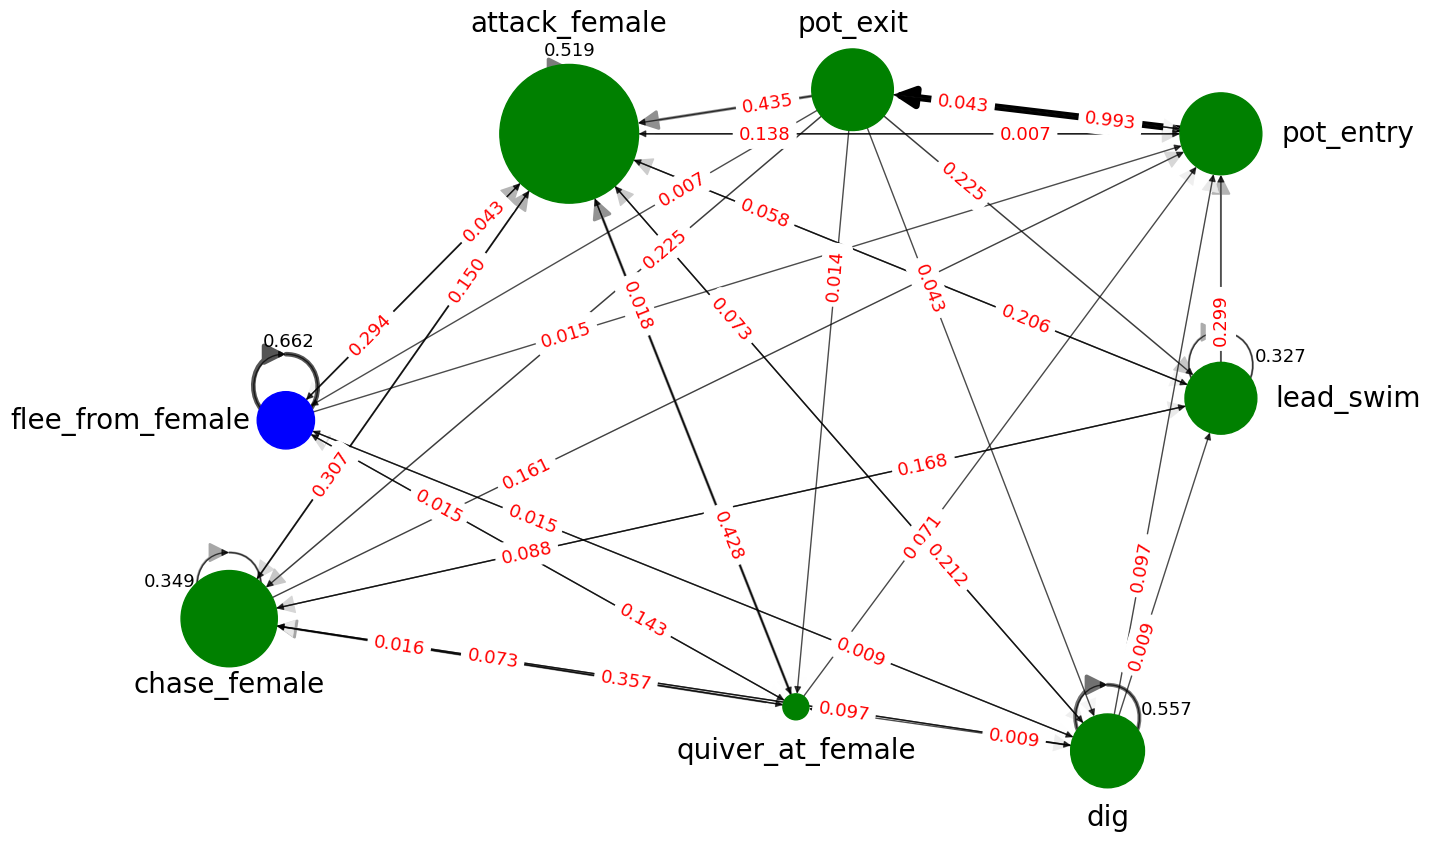

In [8]:
  """
This generates a directed graph (DiGraph) to visualize behavior combination transition probabilities greater than 0% .
It utilizes NetworkX library for graph creation and Matplotlib for visualization.
The function first constructs a DiGraph using the provided dictionaries and assigns node sizes based on the individual behavior's frequency values. 
Nodes are colored based on their type, such as red for aggressive behaviors, blue for fleeing behaviors, and green for reproductive behaviors. 
The width of edges represents the strength of transition probabilities, while edge labels denote these probabilities. 
Finally, node and edge labels are added to the graph to enhance interpretability.
    """
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import numpy as np

import networkx as nx


G = nx.DiGraph()
new_structure = []
for state, key in rel_values.items():
    starting_state, transition_state = state.split('|')
    transition_probability = rel_values[state]  # Assuming rel_values[state] contains the transition probability
    new_structure.append((starting_state, [(transition_state, transition_probability)]))
    
    
"""
Constructs 'edgelist' by iterating over each state and its transitions in 'new_structure'. 
For each transition with a probability greater than zero, it extracts relevant information (starting state, transition state, and probability) 
and creates a tuple to represent the transition, appending it to 'edgelist'.
 """

edgelist = [
    (starting_state, transition_state, transition_probability)
    for starting_state, transitions in new_structure
    for transition_state, transition_probability in transitions
    if transition_probability >0 ]

arrowThickness = []
for source, target, weight in edgelist:
    G.add_node(source)
    G.add_node(target)
    G.add_edge(source, target, weight=weight) 
    arrowThickness.append(weight) 
seed_value = 72
pos = nx.spring_layout(G, seed=seed_value, k=50)

# Define positions for fixed nodes
fixed_positions = {'lateral_display': (-15, -5), 'attack_female': (-8,11),
'quiver_at_female': (0, -15),  'lead_swim': (15,-1), 'chase_female': (-20, -11), 'pot_entry': (15, 11),
'dig': (11, -17), 'pot_exit': (2, 13), 'flee_from_female':(-18,-2)}


print(G.nodes)

# Update positions with fixed node positions
pos.update(fixed_positions)

node_sizes = {
    node: varIndv[node] * 25 if node in varIndv else default_size
    for node in G.nodes
}
color_map = {node: 'red' if node in ["lateral_display", "frontal_display", "bite_male", "chase_male", "quiver_at_male","attack_male"]
              else 'blue' if node in ["flee_from_male", "flee_from_female"]
              else 'green' if node in ["quiver_at_female", "lead_swim", "dig", "pot_entry", "pot_exit", "chase_female","pot_exit","attack_female","pot_entry"]
              else 'unknown'  # You may want to add a default color for other nodes
              for node in G}
nx.draw(G, pos, edgelist=edgelist,node_size=[node_sizes[node] for node in G.nodes],node_color=[color_map[node] for node in G.nodes],
        edge_cmap=plt.cm.gray_r,
        width=[weight*5 for weight in arrowThickness], 
        arrowsize=30,edge_color=arrowThickness)
edge_labels = {(source, target): f'{weight:.3f}' for source, target, weight in edgelist if weight > 0 and source!=target}
edge_labels_self = {(source, target): f'{weight:.3f}' for source, target, weight in edgelist if weight > 0 and source == target}
nx.draw_networkx_edges(G, pos, alpha=0.7, node_size=[node_sizes[node] for node in G.nodes])
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=13, label_pos=0.7)
for node, (x, y) in pos.items():
    if node == 'pot_entry' :
        plt.text(x+4.5, y , str(node), ha='center', va='center', fontsize=20)
    if node == 'attack_female':
        plt.text(x, y+5 , str(node), ha='center', va='center', fontsize=20)
    if node == 'pot_exit' :
        plt.text(x, y+3 , str(node), ha='center', va='center', fontsize=20)
    if node== 'lead_swim':
        plt.text(x+4.5, y , str(node), ha='center', va='center', fontsize=20)
    if node == 'quiver_at_male' or node == 'chase_male' :
        plt.text(x+0.2, y , str(node), ha='center', va='center', fontsize=20)
    if node == 'chase_female' or  node == 'dig' :
        plt.text(x, y-3 , str(node), ha='center', va='center', fontsize=20)
    if  node == 'quiver_at_female' :
        plt.text(x, y-2 , str(node), ha='center', va='center', fontsize=20)
    if node=='flee_from_female'  :
        plt.text(x-5.5, y , str(node), ha='center', va='center', fontsize=20)

for (source, target), weight in edge_labels_self.items():
    if source == target:
        if source == 'flee_from_female' and source == target:
            x, y = pos[source]
            plt.text(x+0.1, y+3.2, weight, fontsize=13, ha='center', va='bottom', color='black')
        if source == 'attack_female':
            x, y = pos[source]
            plt.text(x+0, y+3.4, weight, fontsize=13, ha='center', va='bottom', color='black')
        if source == 'lead_swim':
            x, y = pos[source]
            plt.text(x+2.1, y+1.5, weight, fontsize=13, ha='center', va='bottom', color='black')
        if source == 'chase_female':
            x, y = pos[source]
            plt.text(x-2.1, y+1.3, weight, fontsize=13, ha='center', va='bottom', color='black')
        if source == 'dig':
            x, y = pos[source]
            plt.text(x+2.1, y+1.5, weight, fontsize=13, ha='center', va='bottom', color='black')
        if source == 'quiver_at_female':
            x, y = pos[source]
            plt.text(x-2, y+2, weight, fontsize=13, ha='center', va='bottom', color='black')


